# Maestría en "Analítica de Datos"
**Big Data :** Luis Fernando Castellanos Guarin
---
**Sesión 1:** *Talleres en Panda*



## Ejercicio 1: Carga y visualización de datos en Pandas
---
Cargar un dataset en Pandas desde un archivo CSV y visualiza las primeras filas de los datos.



In [ ]:
import pandas as pd   #importamos la libreria

In [ ]:
# Cargar datos desde un archivo CSV (por ejemplo, un dataset de ventas)
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv"
df = pd.read_csv(url)

# Mostrar las primeras 5 filas
print(df.head(),"\n__________________________")

# Mostrar información general del dataset
print(df.info())

## Ejercicio 2: Filtrado y selección de datos

---

*Filtrar los datos de un dataset para obtener solo las filas donde una columna tenga un valor específico.*

In [ ]:
##---------------SEGUIMOS CON EL MISMO DATASET--------------
# Filtrar el dataset para mostrar solo los diamantes de tipo "Premium"
df_premium = df[df["cut"] == "Premium"]

# Mostrar las primeras 5 filas del nuevo DataFrame filtrado
print(df_premium.head())

# Contar cuántos registros tienen el tipo "Premium"
print(f"La Cantidad de diamantes 'Premium' es: {df_premium.shape[0]}")

## Ejercicio 3: Agregación y estadísticas descriptivas

---
*Realizar un análisis estadístico básico del dataset utilizando funciones de agregación en Pandas.*

In [ ]:
# Estadísticas descriptivas del precio de los diamantes
print("________Estadísticas descriptivas del precio________\n",df["price"].describe())

# Calcular el precio promedio por cada tipo de corte
precio_promedio_por_corte = df.groupby("cut")["price"].mean()
print("\n________________________precio_promedio_por_corte_________\n",precio_promedio_por_corte)



*   **count:** Indica la cantidad de valores no nulos presentes en la columna XXX
*   **mean:** Representa el promedio de los precios.
* **std:**  Es la desviación estándar. Esta medida nos indica qué tan dispersos están los datos alrededor de la media. (*Un valor alto de desviación estándar sugiere que los valores varían mucho, mientras que un valor bajo indica que los valores están más concentrados cerca de la media.*)
* **min:** Es el precio más bajo encontrado en el conjunto de datos.
*  **25%:** Corresponde al primer cuartil. Esto significa que el 25% de los valores tienen un precio igual o inferior a XX valor.
*  **50%:** Es la mediana, que representa el valor central de los datos cuando están ordenados de menor a mayor. En este caso, la mitad de los valores tienen un precio igual o inferior a XX.
* **75%:** Es el tercer cuartil. El 75% de los diamantes tienen un precio igual o inferior a 5324.25 unidades monetarias.
*  **max:** Indica el precio más alto encontrado en el conjunto de datos.


## Ejercicio 4: Limpieza y transformación de datos

---
*Limpiar los datos eliminando valores nulos y creando nuevas columnas derivadas de las existentes.*

In [ ]:
# Verificar si hay valores nulos en el dataset
print(df.isnull().sum())

# Eliminar filas con valores nulos (si existieran)
df_clean = df.dropna()

# Crear una nueva columna con el precio en miles de dólares
df_clean["price_k"] = df_clean["price"] / 1000

# Mostrar el resultado
print(df_clean.head())

## Ejercicio 5: Análisis avanzado con Pandas

---
*Realizar un análisis avanzado utilizando técnicas de Pivot Tables, Merge y Apply en Pandas.*

In [ ]:
# Crear una tabla dinámica para ver el precio promedio por corte y color
pivot_table = df.pivot_table(values="price", index="cut", columns="color", aggfunc="mean")
print(pivot_table)

# Crear un DataFrame con categorías de precios
bins = [0, 1000, 5000, 10000, 20000]
labels = ["Bajo", "Medio", "Alto", "Muy Alto"]
df["price_category"] = pd.cut(df["price"], bins=bins, labels=labels)

# Mostrar la cantidad de diamantes en cada categoría
print(df["price_category"].value_counts())

# Crear una función para clasificar según el quilataje
def clasificar_carat(carat):
    if carat < 0.5:
        return "Pequeño"
    elif carat < 1.0:
        return "Mediano"
    else:
        return "Grande"

# Aplicar la función a la columna "carat"
df["size_category"] = df["carat"].apply(clasificar_carat)

# Mostrar los primeros registros con las nuevas clasificaciones
print(df.head())

## Ejercicio 6: Visualización de datos con Matplotlib y Seaborn

---
*Utiliza Matplotlib y Seaborn para graficar los resultados obtenidos en el Ejercicio 5, mostrando:

*   Un heatmap de la tabla dinámica de precios.
*   Un gráfico de barras de la cantidad de diamantes en cada categoría de precio.
*   Un gráfico de dispersión del tamaño del diamante versus el precio.*

Librerías necesarias:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

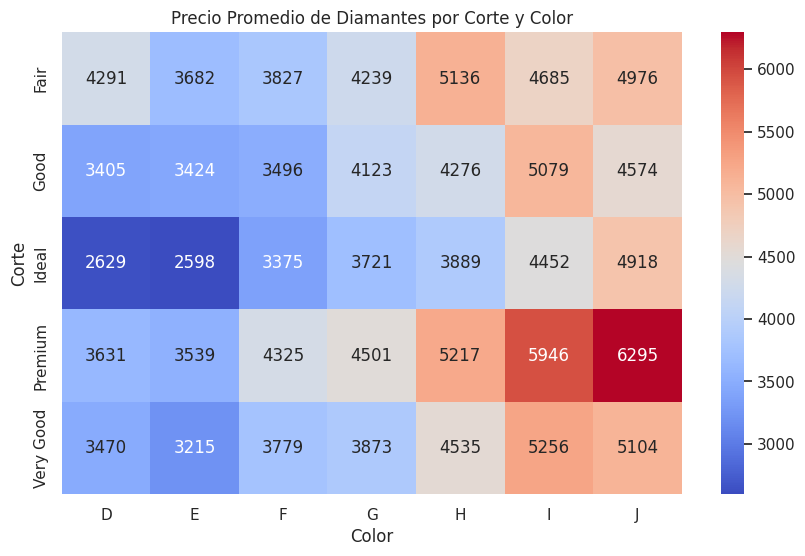

<ipython-input-15-e842a4e9c047>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["price_category"], palette="muted", order=["Bajo", "Medio", "Alto", "Muy Alto"])


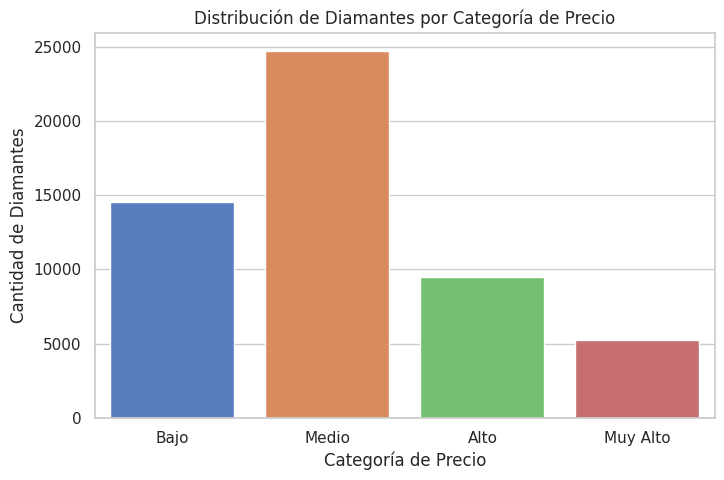

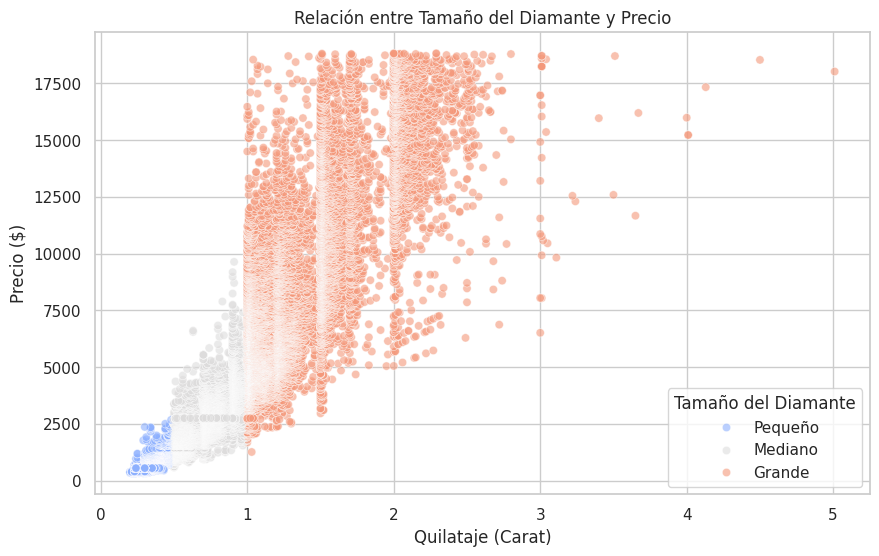

In [ ]:
# Configurar estilo de gráficos
sns.set(style="whitegrid")

# 1. Heatmap del precio promedio por corte y color
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Precio Promedio de Diamantes por Corte y Color")
plt.xlabel("Color")
plt.ylabel("Corte")
plt.show()

# 2. Gráfico de barras de la cantidad de diamantes por categoría de precio
plt.figure(figsize=(8,5))
sns.countplot(x=df["price_category"], palette="muted", order=["Bajo", "Medio", "Alto", "Muy Alto"])
plt.title("Distribución de Diamantes por Categoría de Precio")
plt.xlabel("Categoría de Precio")
plt.ylabel("Cantidad de Diamantes")
plt.show()

# 3. Gráfico de dispersión del tamaño del diamante vs precio
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["carat"], y=df["price"], hue=df["size_category"], palette="coolwarm", alpha=0.6)
plt.title("Relación entre Tamaño del Diamante y Precio")
plt.xlabel("Quilataje (Carat)")
plt.ylabel("Precio ($)")
plt.legend(title="Tamaño del Diamante")
plt.show()

Explicación de los gráficos:
* Heatmap: Muestra el precio promedio de los diamantes según su corte y color.
* Gráfico de barras: Muestra la cantidad de diamantes en cada categoría de precio.
* Gráfico de dispersión: Relaciona el tamaño del diamante (quilataje) con su precio, diferenciando por categorías de tamaño.